In [1]:
from transformer_analysis import evaluate_transformer

In [2]:
from qiskit.transpiler import transpile
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import *
from qiskit.transpiler.passes.mapping import *
from qiskit import BasicAer
from qiskit.mapper import CouplingMap
from qiskit import IBMQ
from qiskit import QuantumRegister, QuantumCircuit
from qiskit import execute, compile

from math import pi

In [3]:
IBMQ.load_accounts()

In [4]:
backend = BasicAer.get_backend( 'qasm_simulator' )
backend_qx2 = IBMQ.get_backend( 'ibmqx2' )
backend_unitary = BasicAer.get_backend( 'unitary_simulator' )

In [5]:
couplingmap = CouplingMap([ [0,1], [0,2] ])

In [6]:
def basic_compiler ( circuit ):
    pm = PassManager()
    pm.append( Unroller( ['u3', 'cx'] ) )
    pm.append( CXCancellation()  )
    pm.append( Optimize1qGates() )
    pm.append( CXCancellation()  )
    pm.append( Optimize1qGates() )
    pm.append( CXCancellation()  )
    pm.append( Optimize1qGates() )
    pm.append( TrivialLayout( couplingmap ) )
    pm.append( BasicSwap( couplingmap ) )
    pm.append( CXDirection( couplingmap ) )
    pm.append( CXCancellation()  )
    pm.append( Optimize1qGates() )
    pm.append( CXCancellation()  )
    pm.append( Optimize1qGates() )
    pm.append( CXCancellation()  )
    pm.append( Optimize1qGates() )
    return transpile( circuit, backend, pass_manager=pm )

def lookahead_compiler ( circuit ):
    pm = PassManager()
    pm.append( Unroller( ['u3', 'cx'] ) )
    pm.append( CXCancellation()  )
    pm.append( Optimize1qGates() )
    pm.append( CXCancellation()  )
    pm.append( Optimize1qGates() )
    pm.append( CXCancellation()  )
    pm.append( Optimize1qGates() )
    pm.append( TrivialLayout( couplingmap ) )
    pm.append( LookaheadSwap( couplingmap ) )
    pm.append( CXDirection( couplingmap ) )
    pm.append( CXCancellation()  )
    pm.append( Optimize1qGates() )
    pm.append( CXCancellation()  )
    pm.append( Optimize1qGates() )
    pm.append( CXCancellation()  )
    pm.append( Optimize1qGates() )
    return transpile( circuit, backend, pass_manager=pm )

def stochastic_compiler ( circuit ):
    pm = PassManager()
    pm.append( Unroller( ['u3', 'cx'] ) )
    pm.append( CXCancellation()  )
    pm.append( Optimize1qGates() )
    pm.append( CXCancellation()  )
    pm.append( Optimize1qGates() )
    pm.append( CXCancellation()  )
    pm.append( Optimize1qGates() )
    pm.append( TrivialLayout( couplingmap ) )
    pm.append( StochasticSwap( couplingmap, seed = 0 ) )
    pm.append( CXDirection( couplingmap ) )
    pm.append( CXCancellation()  )
    pm.append( Optimize1qGates() )
    pm.append( CXCancellation()  )
    pm.append( Optimize1qGates() )
    pm.append( CXCancellation()  )
    pm.append( Optimize1qGates() )
    return transpile( circuit, backend, pass_manager=pm )

def no_transformation ( circuit ):
    return circuit

In [7]:
# Circuit

num_qubits = 3; # The number of qubits

q = QuantumRegister(num_qubits, 'q')
circuit_qft = QuantumCircuit(q)

# Start Circuit
# Source: https://github.com/Qiskit/qiskit-terra/blob/master/examples/python/qft.py
def qft(circ, q, n):
    """n-qubit QFT on q in circ."""
    for j in range(n):
        for k in range(j):
            circ.cu1(pi/float(2**(j-k)), q[j], q[k])
        circ.h(q[j])

qft( circuit_qft, q, num_qubits )

# End Circuit

circuit_qft.draw( output='mpl', style = { 'usepiformat': True } )

<Figure size 752.5x275.917 with 1 Axes>

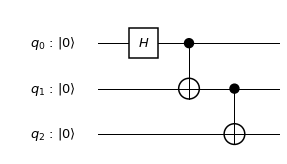

In [8]:
q = QuantumRegister( 3, 'q' )
circuit_ghz = QuantumCircuit(q)

circuit_ghz.h( q[0] )
circuit_ghz.cx( q[0], q[1] ) 
circuit_ghz.cx( q[1], q[2] )

circuit_ghz.draw( output='mpl', style = { 'usepiformat': True } )

In [9]:
circuit_list = [ circuit_qft, circuit_ghz ]

In [10]:
evaluate_transformer( lookahead_compiler, circuit_list )

0.9962233824452594

In [11]:
evaluate_transformer( basic_compiler, circuit_list )

0.9960587055661501

In [12]:
evaluate_transformer( no_transformation, circuit_list )

0.995420402638552

In [13]:
evaluate_transformer( stochastic_compiler, circuit_list )

0.9962233824452594

In [14]:
evaluate_transformer( lookahead_compiler )

0.9961361583518382

In [15]:
evaluate_transformer( basic_compiler )

0.996111074821292

In [16]:
evaluate_transformer( no_transformation )

0.9960540198655778

In [17]:
evaluate_transformer( stochastic_compiler )

0.9961361583518382